In [37]:
from active_clustering_util import *

In [38]:
filename = 'filtered_3way_after_80%.xes'
log, variants_count = read_xes(filename)
GL = add_frequency_into_variants_count(variants_count)
VARIANT = []
for gl in GL: 
    VARIANT.append(gl['variant'])

length of trace 2534 
length of event 13589


In [39]:
w = 1  #window size
tf = 1 #target fitness
nb_clus = 4 #number of cluster
N = 1 #case separate 
mcs = 0.25

****************************************************************************************************
START OF No. 0 CLUSTERING

Clustering() is called. mcs:0.25, tf:1, w:1
----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is empty set or |W| = 1. |C|:0, |W|:26 ->  R[0] is to be added.


 * Fitness check to be done with cur_dpi
	 A,B,C,D,Z...

 * CASE of fit 1.0 >= 1 tf -> Cur_dpi is added to cluster C & removed from R
	

END OF LOOP with cur_dpi____fit : 1.0 / size of C: 1 / size of R: 25 / size of I: 0


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is not empty set, so w in W to be selected with min_dist

 * Selected dpi via dpi_finder() :
	A,C,B,D,Z... with dist 0.0

 * Fitness check to be done with cur_dpi
	 A,C,B,D,Z...

 * CASE of fit 1.0 >= 1 tf -> Cur_dpi is added to cluster C & removed from R
	

END OF LOOP 

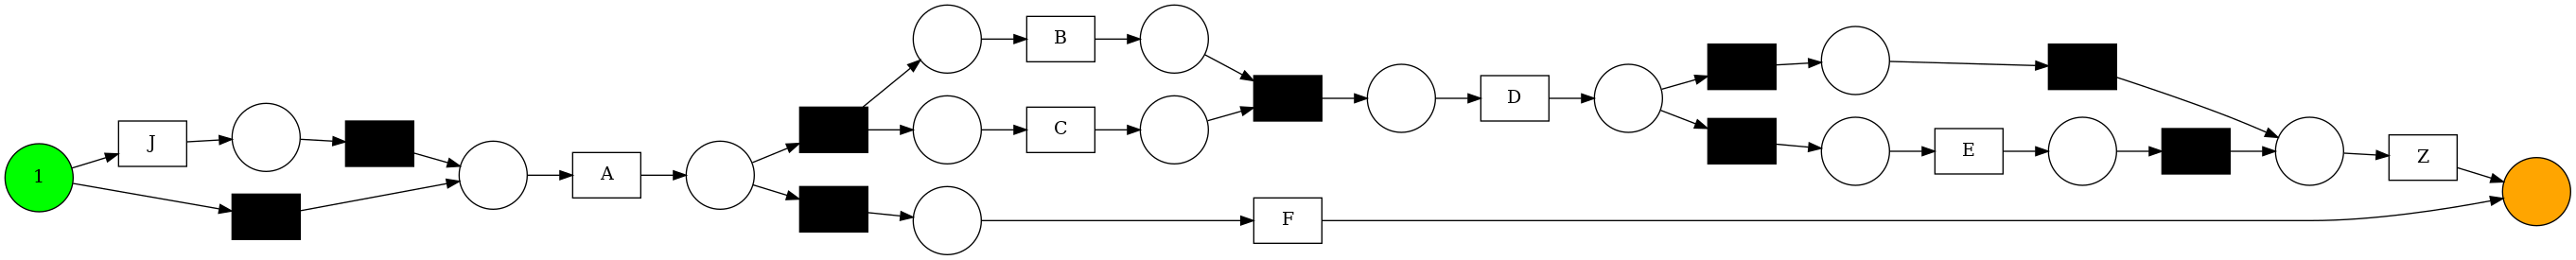

COMPLETION OF SINGLE CLUSTERING
****************************************************************************************************
START OF No. 1 CLUSTERING

Clustering() is called. mcs:0.25, tf:1, w:1
----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is empty set or |W| = 1. |C|:0, |W|:20 ->  R[0] is to be added.


 * Fitness check to be done with cur_dpi
	 A,C,G,B,D,Z...

 * CASE of fit 1.0 >= 1 tf -> Cur_dpi is added to cluster C & removed from R
	

END OF LOOP with cur_dpi____fit : 1.0 / size of C: 1 / size of R: 19 / size of I: 0


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is not empty set, so w in W to be selected with min_dist

 * Selected dpi via dpi_finder() :
	A,H,B,C,D,Z... with dist 0.0

 * Fitness check to be done with cur_dpi
	 A,H,B,C,D,Z...

 * CASE of fit 1.0 >= 1 tf -> Cur_dpi is added to clus

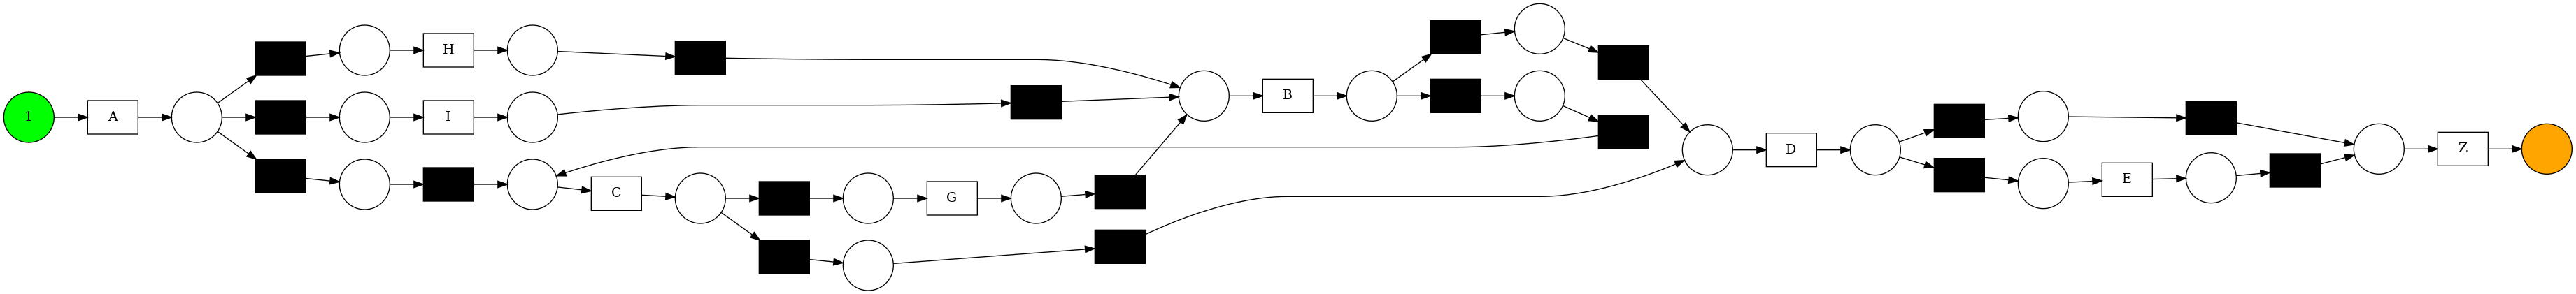

COMPLETION OF SINGLE CLUSTERING
****************************************************************************************************
START OF No. 2 CLUSTERING

Clustering() is called. mcs:0.25, tf:1, w:1
----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is empty set or |W| = 1. |C|:0, |W|:15 ->  R[0] is to be added.


 * Fitness check to be done with cur_dpi
	 A,I,C,B,D,Z...

 * CASE of fit 1.0 >= 1 tf -> Cur_dpi is added to cluster C & removed from R
	

END OF LOOP with cur_dpi____fit : 1.0 / size of C: 1 / size of R: 14 / size of I: 0


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is not empty set, so w in W to be selected with min_dist

 * Selected dpi via dpi_finder() :
	A,H,C,B,D,Z... with dist 0.0

 * Fitness check to be done with cur_dpi
	 A,H,C,B,D,Z...

 * CASE of fit 1.0 >= 1 tf -> Cur_dpi is added to clus

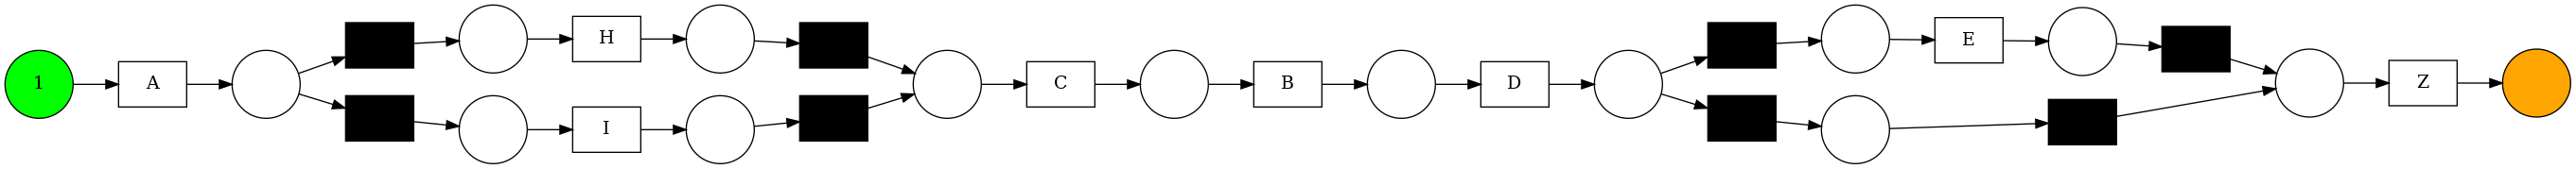

COMPLETION OF SINGLE CLUSTERING
****************************************************************************************************
START OF No. 3 CLUSTERING

Clustering() is called. mcs:0.25, tf:1, w:1
----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is empty set or |W| = 1. |C|:0, |W|:12 ->  R[0] is to be added.


 * Fitness check to be done with cur_dpi
	 A,I,H,B,C,D,Z...

 * CASE of fit 1.0 >= 1 tf -> Cur_dpi is added to cluster C & removed from R
	

END OF LOOP with cur_dpi____fit : 1.0 / size of C: 1 / size of R: 11 / size of I: 0


----------------------------------------------------------------------------------------------------
START OF LOOP with cur_dpi

 * C is not empty set, so w in W to be selected with min_dist

 * Selected dpi via dpi_finder() :
	A,K,B,C,D,E,Z... with dist 0.0

 * Fitness check to be done with cur_dpi
	 A,K,B,C,D,E,Z...

 * CASE of fit 1.0 >= 1 tf -> Cur_dpi is added t

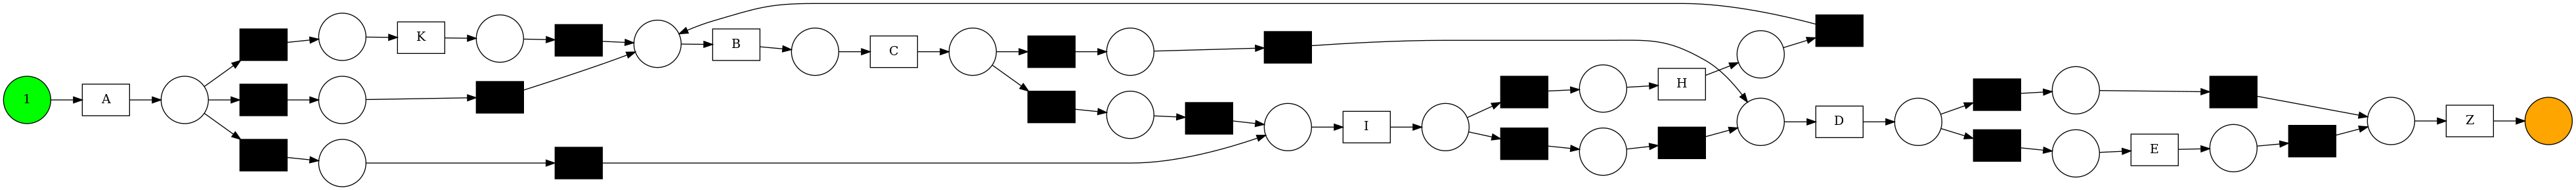

COMPLETION OF SINGLE CLUSTERING
COMPLETION OF WHOLE CLUSTERING


In [40]:
R=VARIANT.copy()
C=[]
I=[]
CS=[]

for i in range(nb_clus) : 
    print("*"*100)
    print("START OF No. {} CLUSTERING".format(i))
    C = []
    I = []
    C, R = clustering(
        C, I, R, 
        log, mcs, tf, w, 
        visual=False, 
        output=False
    )
    CS.append(C)

    print("COMPLETION OF SINGLE CLUSTERING")
print("COMPLETION OF WHOLE CLUSTERING")


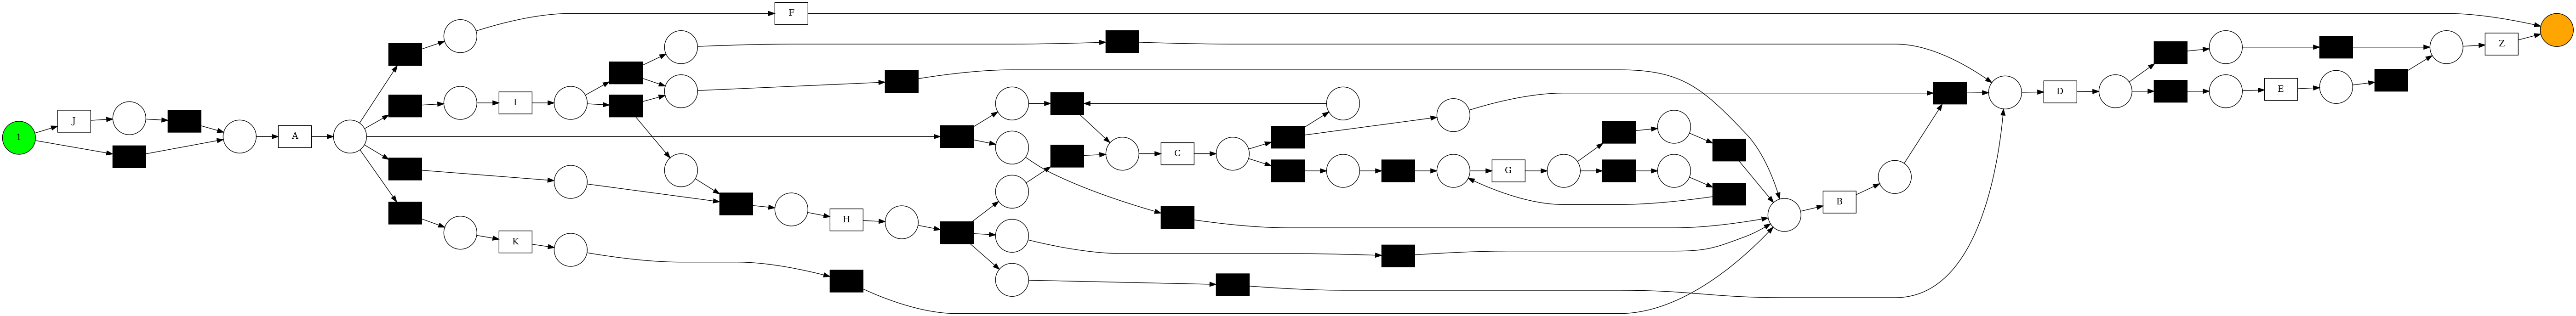

In [41]:
visualization(log, VARIANT, True, False)


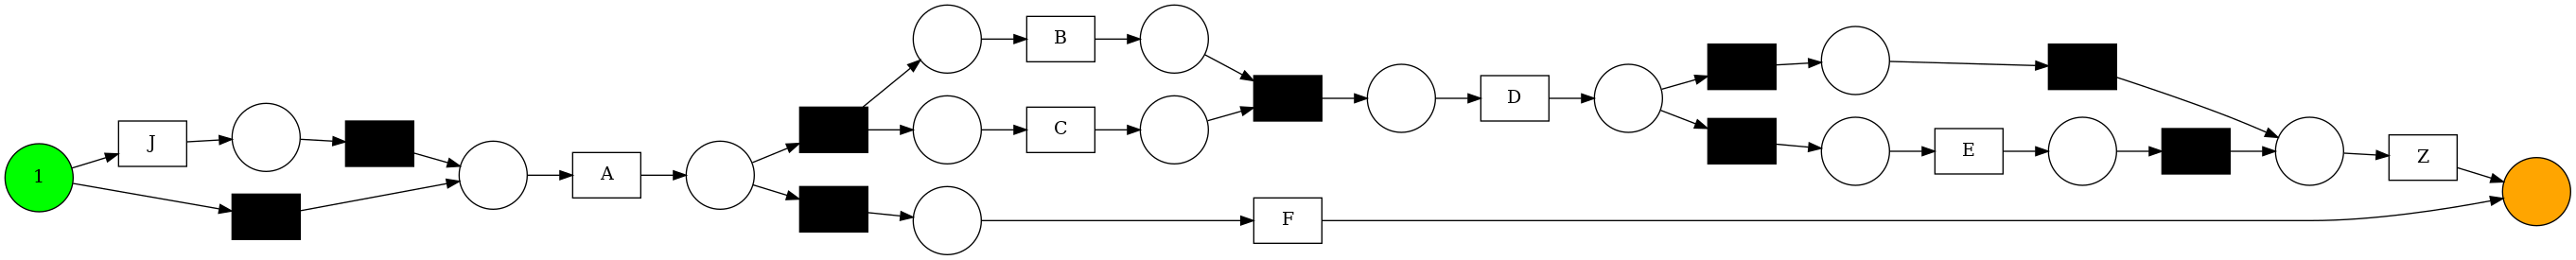

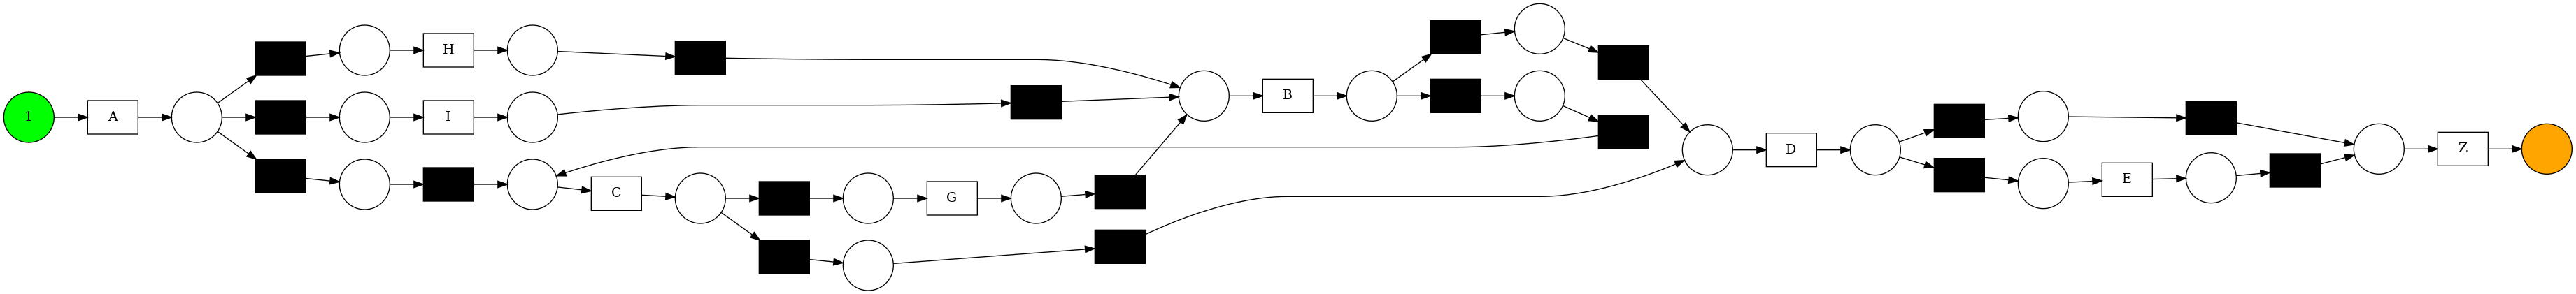

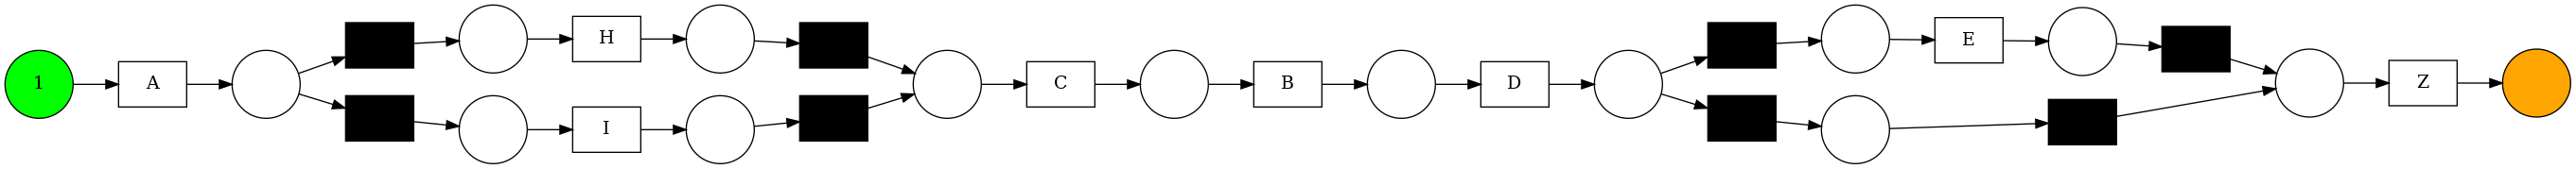

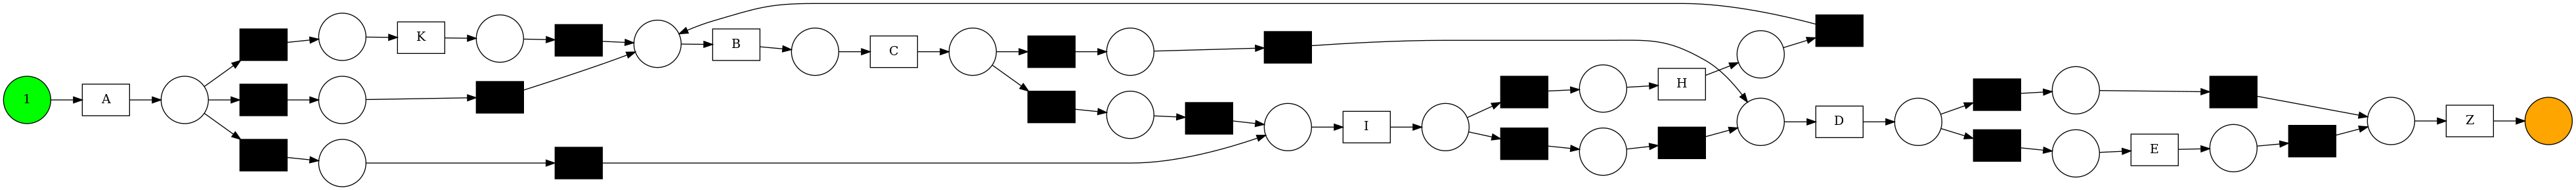

In [42]:
for cs in CS : 
    visualization(log, cs, True, False)


In [7]:
#for f1 score measurement 
# RECALL can be approximated by fitness
# ACCURACY can be approximated by precision
from pm4py.evaluation.precision import evaluator as precision_evaluator
net, im, fm = heuristics_miner.apply(variants_filter.apply(log, C))
prec = precision_evaluator.apply(log, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)

In [10]:
#for complexity measurement
places = net.places
transitions = net.transitions
arcs = net.arcs